In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
farm_data = pd.read_csv('/content/drive/MyDrive/作品集_古書瑋/tea_env_data.csv',encoding='utf-8')#, usecols=['土壤溫度']


In [4]:
SoilTemp = farm_data[["土壤溫度"]].dropna().to_numpy()

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
SoilTemp_scaled = scaler.fit_transform(SoilTemp.reshape(-1, 1))

In [6]:

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [7]:
# 設置時間序列長度
sequence_length = 10

# 生成輸入序列和輸出序列
X, y = create_sequences(SoilTemp_scaled, sequence_length)

# 劃分訓練集和測試集
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
X_train.shape

(2381, 10, 1)

In [8]:
# 建構GRU模型
model = tf.keras.Sequential([
    tf.keras.layers.GRU(20, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse')

# 訓練模型
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0542
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.2925e-04
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.2774e-04
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.8859e-04
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8999e-04
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.4546e-04
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8942e-04
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4483e-04
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.08

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
y_train RMSE: 0.012251330821616842
y_test RMSE: 0.017106185925634038


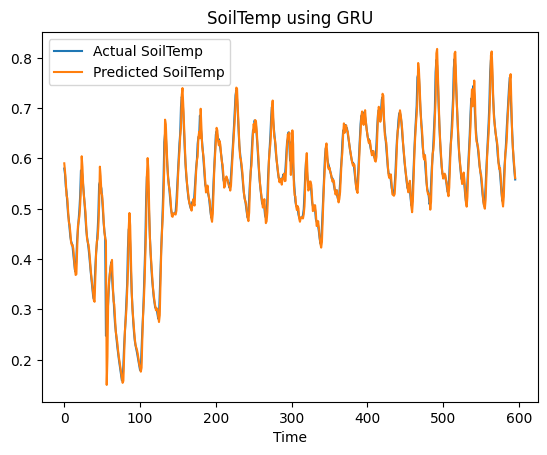

In [9]:
# 使用模型進行預測
predicted_values = model.predict(X_test)
predicted_values2 = model.predict(X_train)

# 計算RMSE
rmse = np.sqrt(mean_squared_error(y_train, predicted_values2))
print("y_train RMSE:", rmse)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print("y_test RMSE:", rmse)


# 繪製結果
import matplotlib.pyplot as plt
plt.plot(y_test.flatten(), label='Actual SoilTemp')
plt.plot(predicted_values.flatten(), label='Predicted SoilTemp')
plt.xlabel('Time')
plt.title('SoilTemp using GRU')
plt.legend()
plt.show()